In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## 读取数据

In [2]:
# 读取数据
train_df = pd.read_csv('./data/train.csv')
print(train_df.columns)
# train_df.head()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


PassengerId => 乘客ID<br>
Pclass => 乘客等级(1/2/3等舱位)<br>
Name => 乘客姓名<br>
Sex => 性别<br>
Age => 年龄<br>
SibSp => 堂兄弟/妹个数<br>
Parch => 父母与小孩个数<br>
Ticket => 船票信息<br>
Fare => 票价<br>
Cabin => 客舱<br>
Embarked => 登船港口

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


* <font>Age（年龄）属性只有714名乘客有记录<font>
* <font>Cabin（客舱）更是只有204名乘客是已知的<font>

In [4]:
# 查看数据统计情况
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 数据探索

### 数据特征分为：连续值和离散值
* 离散值：性别（男，女） 登船地点（S,Q,C）船舱等级（1，2，3）

* 连续值：年龄，船票价格

Text(0.5, 1.0, 'Survived')

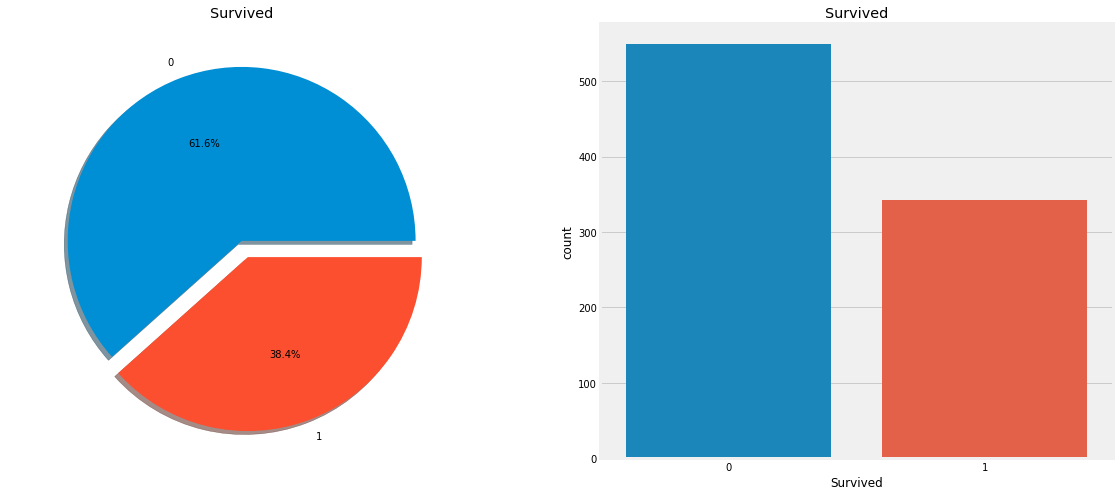

In [5]:
# 查看生存比例
fig,axes = plt.subplots(1,2,figsize=(18,8))
train_df['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=axes[0],shadow=True)
axes[0].set_title('Survived')
axes[0].set_ylabel(' ')

sns.countplot('Survived',data=train_df,ax=axes[1])
axes[1].set_title('Survived')

### 探索离散特征

### 单特征

整个船上当中只有38.4%的人员存活了下来，接下来查看各个属性和留存的关系吧！

Text(0.5, 1.0, 'Sex:Survived vs Dead')

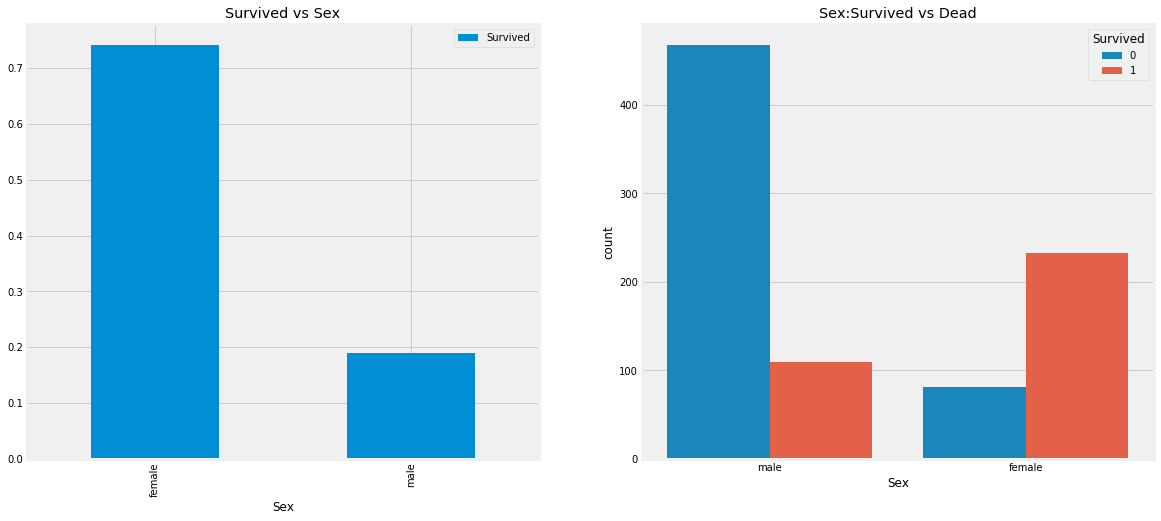

In [6]:
# 性别和生存率的关系
fig,axes = plt.subplots(1,2,figsize=(18,8))
train_df[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=axes[0])
axes[0].set_title('Survived vs Sex')

sns.countplot('Sex',hue='Survived',data=train_df,ax=axes[1])
axes[1].set_title('Sex:Survived vs Dead')

从第一张图可以看出来，女性的获救比例在75%，而男性还不足20%
从右图，又可以观察出来，船上男性的数量比女性多的多，但是存活率却很低
这是一个很有区分度的特征，必须使用！

Text(0.5, 1.0, 'Pclass:Survived vs Dead')

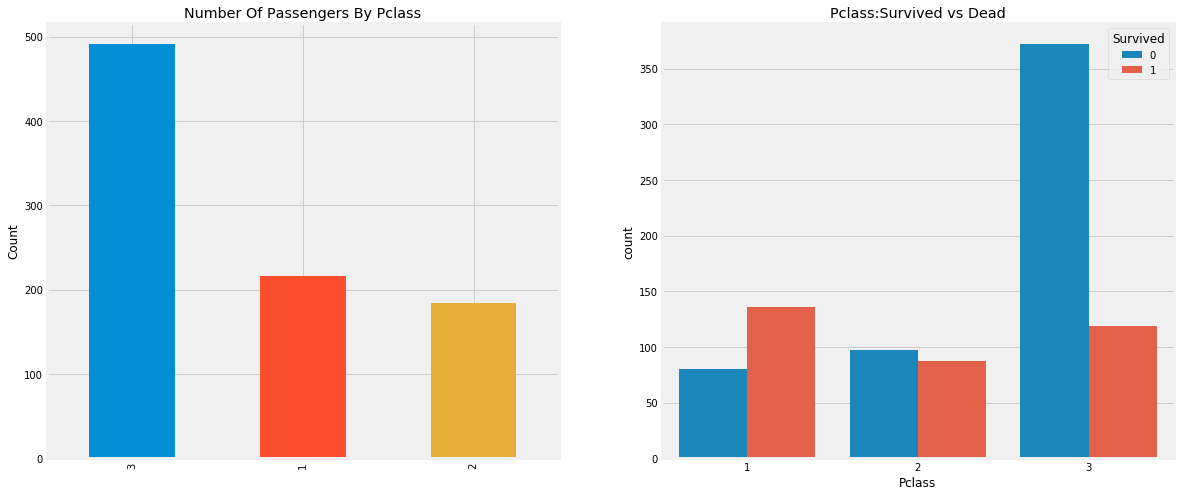

In [7]:
# 船舱等级和生存率的关系
print(pd.crosstab(train_df['Pclass'],train_df['Survived'],margins=True).style.background_gradient(cmap='summer_r'))

# 船舱等级和生存率的关系
fig,axes = plt.subplots(1,2,figsize=(18,8))
train_df['Pclass'].value_counts().plot.bar(ax=axes[0])
axes[0].set_title('Number Of Passengers By Pclass')
axes[0].set_ylabel('Count')

sns.countplot('Pclass',hue='Survived',data=train_df,ax=axes[1])
axes[1].set_title('Pclass:Survived vs Dead')

由左图可知，船舱登记为3的乘客最低，但是在右图中对应的存活率却是很低的，船舱登记为1和2的存活率较高，我们可以分析出，1，2船舱的乘客级别高，富有，被救援的机会大。

Text(0.5, 1.0, 'Embarked:Survived vs Dead')

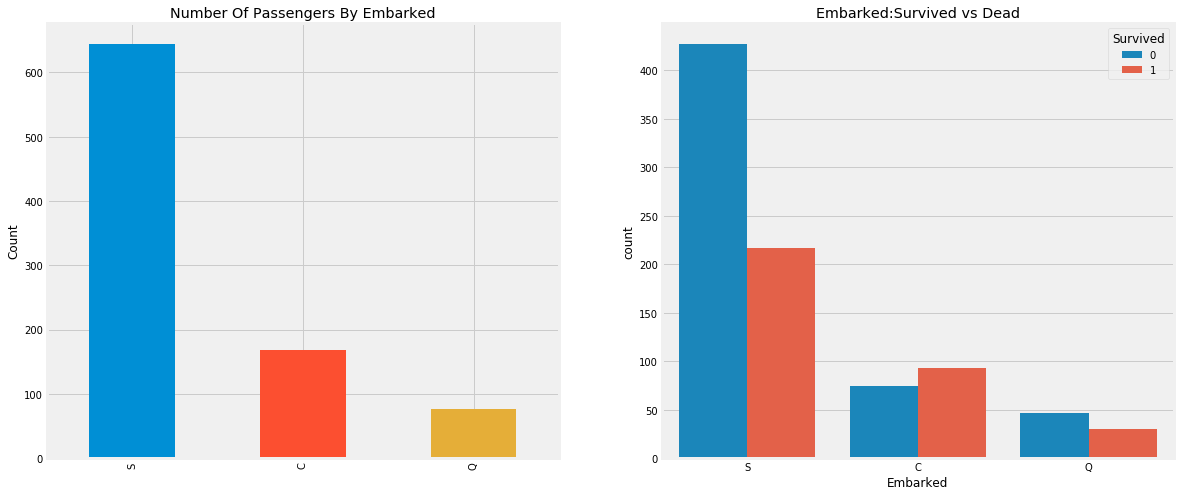

In [8]:
# 登陆港口和生存率的关系
fig,axes = plt.subplots(1,2,figsize=(18,8))
train_df['Embarked'].value_counts().plot.bar(ax=axes[0])
axes[0].set_title('Number Of Passengers By Embarked')
axes[0].set_ylabel('Count')

sns.countplot('Embarked',hue='Survived',data=train_df,ax=axes[1])
axes[1].set_title('Embarked:Survived vs Dead')

S、Q没有明显差别，S的登船人数最多。C登船港口有明显的区别，登船人数最少，且获救比例高于50%，我们暂时先记住这个特征。

### 交叉特征

In [9]:
# 船舱等级和性别与生存率
pd.crosstab([train_df['Sex'],train_df['Survived']],train_df['Pclass'],margins=True).style.background_gradient(cmap='summer_r')


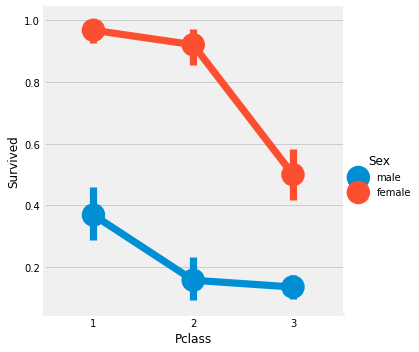

In [10]:
sns.factorplot('Pclass','Survived',hue='Sex',data=train_df)

从上图我们可以看出，性别和船舱等级对获救的巨大影响，同时可以看出，等级1的女性中存活比例高达95%左右，共94人中91个人都存活了下来。

In [11]:
# 登船港口和性别与生存率
pd.crosstab([train_df['Sex'],train_df['Survived']],train_df['Embarked'],margins=True).style.background_gradient(cmap='summer_r')

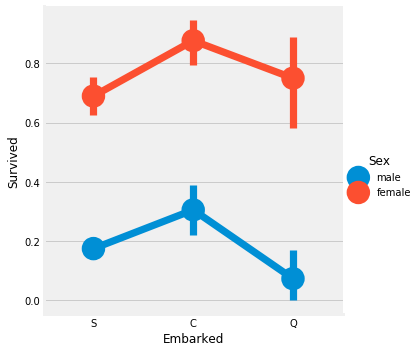

In [12]:
sns.factorplot('Embarked','Survived',hue='Sex',data=train_df)

C港口的存活比例是比较高的，这与之前的分析是一致的，Q港口的男性存活率最低，大概只有15%左右

In [13]:
# 登船港口和船舱等级与生存率
pd.crosstab([train_df['Pclass'],train_df['Survived']],train_df['Embarked'],margins=True).style.background_gradient(cmap='summer_r')


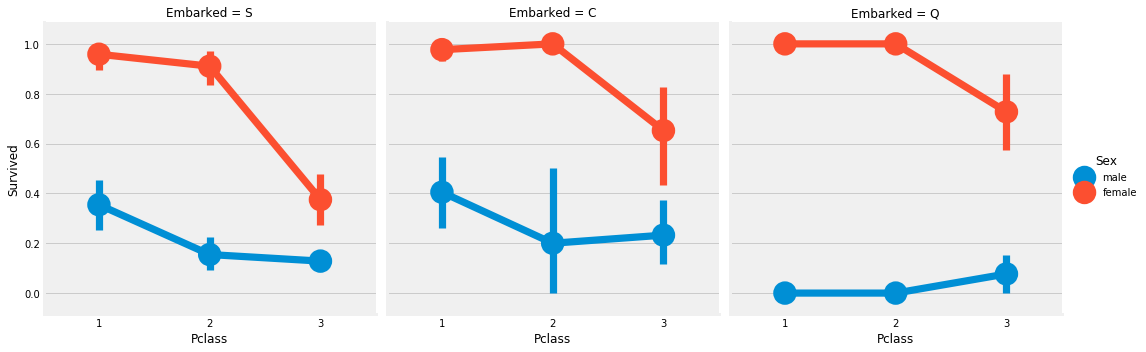

In [14]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=train_df)

观察:

- 存活的几率几乎为1 在pclass1和pclass2中的女人。
- pclass3 的乘客中男性和女性的生存率都是很偏低的。
- 端口Q很不幸，因为那里都是3等舱的乘客。

### 探索连续特征

In [15]:
# 年龄
print('Oldest Passenger was of:',train_df['Age'].max(),'Years')
print('Youngest Passenger was of:',train_df['Age'].min(),'Years')
print('Average Age on the ship:',train_df['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


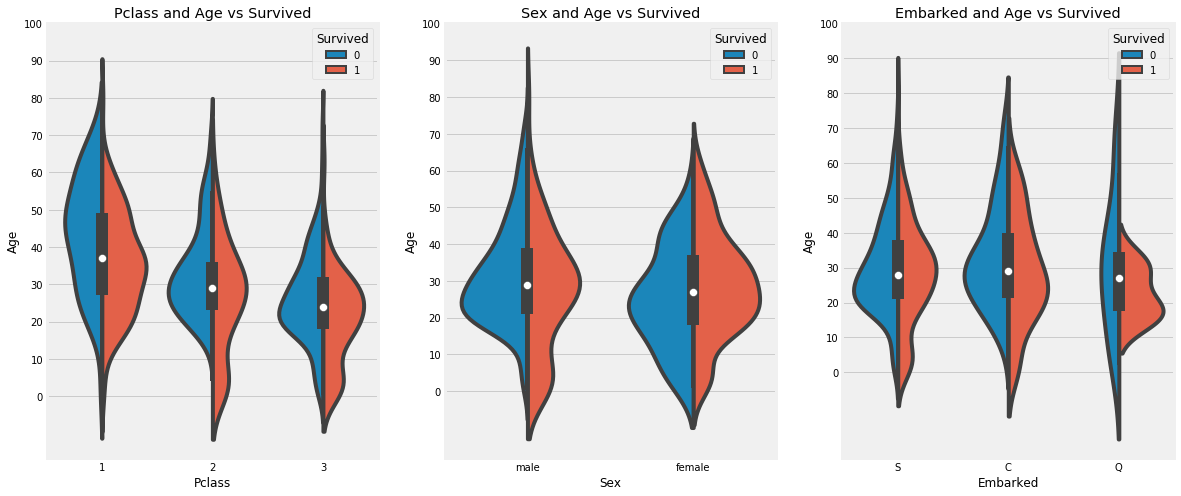

In [16]:
# 绘图可视化年龄、船舱等级、性别对生存的影响和关系
fig,axes = plt.subplots(1,3,figsize=(18,8))
sns.violinplot('Pclass','Age',hue='Survived',data=train_df,split=True,ax=axes[0])
axes[0].set_title('Pclass and Age vs Survived')
axes[0].set_yticks(range(0,110,10))

sns.violinplot("Sex","Age", hue="Survived", data=train_df,split=True,ax=axes[1])
axes[1].set_title('Sex and Age vs Survived')
axes[1].set_yticks(range(0,110,10))

sns.violinplot("Embarked","Age", hue="Survived", data=train_df,split=True,ax=axes[2])
axes[2].set_title('Embarked and Age vs Survived')
axes[2].set_yticks(range(0,110,10))

结论：

- 10岁以下儿童的存活率随passenger数量增加而增加
- 20-50岁的获救几率更高一些
- Q港口45以上和5岁以下没有生还可能

In [17]:
# 为age属性填充缺失值
# 按照称呼中的小姐，夫人等等分组填充均值
train_df['Initial'] = train_df['Name'].str.extract('([A-Za-z]+)\.')

In [18]:
pd.crosstab(train_df['Initial'],train_df['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [19]:
# 进行替换
train_df['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [20]:
# 按照分组来求平均年龄
train_df.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [21]:
# 使用每组的均值来进行填充缺失值
train_df.loc[(train_df.Age.isnull())&(train_df.Initial=='Mr'),'Age']=33
train_df.loc[(train_df.Age.isnull())&(train_df.Initial=='Mrs'),'Age']=36
train_df.loc[(train_df.Age.isnull())&(train_df.Initial=='Master'),'Age']=5
train_df.loc[(train_df.Age.isnull())&(train_df.Initial=='Miss'),'Age']=22
train_df.loc[(train_df.Age.isnull())&(train_df.Initial=='Other'),'Age']=46

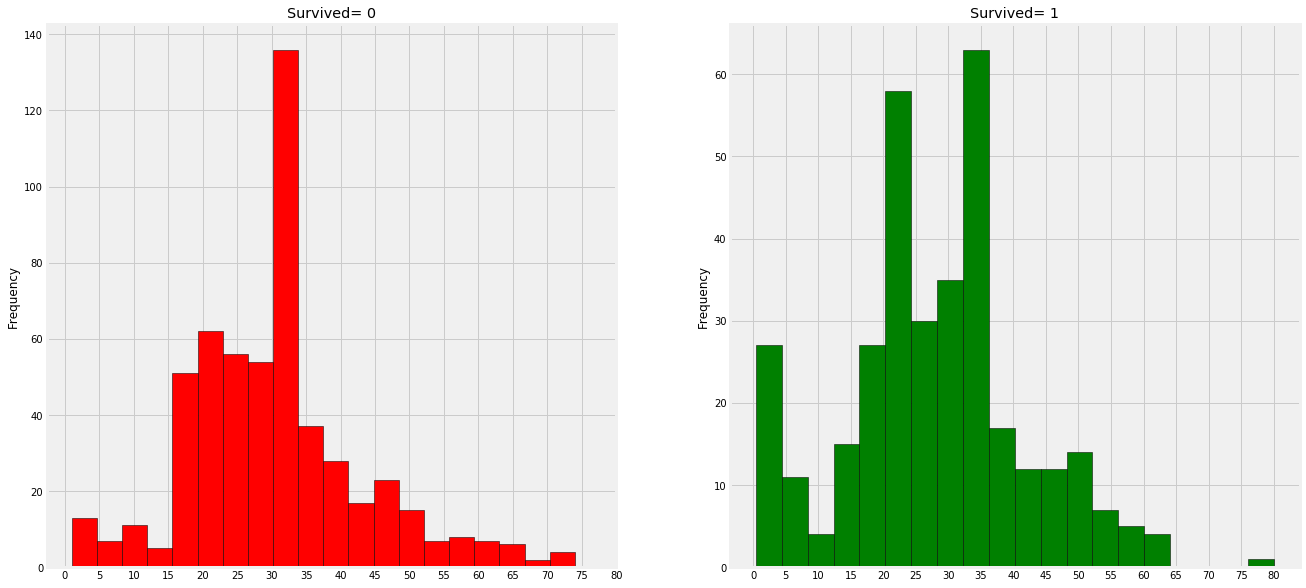

In [22]:
# 绘图可视化
fig,axes = plt.subplots(1,2,figsize=(20,10))
train_df[train_df['Survived']==0].Age.plot.hist(ax=axes[0],bins=20,edgecolor='black',color='red')
axes[0].set_title('Survived= 0')
x1 = list(range(0,85,5))
axes[0].set_xticks(x1)

train_df[train_df['Survived']==1].Age.plot.hist(ax=axes[1],color='green',bins=20,edgecolor='black')
axes[1].set_title('Survived= 1')
x2 = list(range(0,85,5))
axes[1].set_xticks(x2)

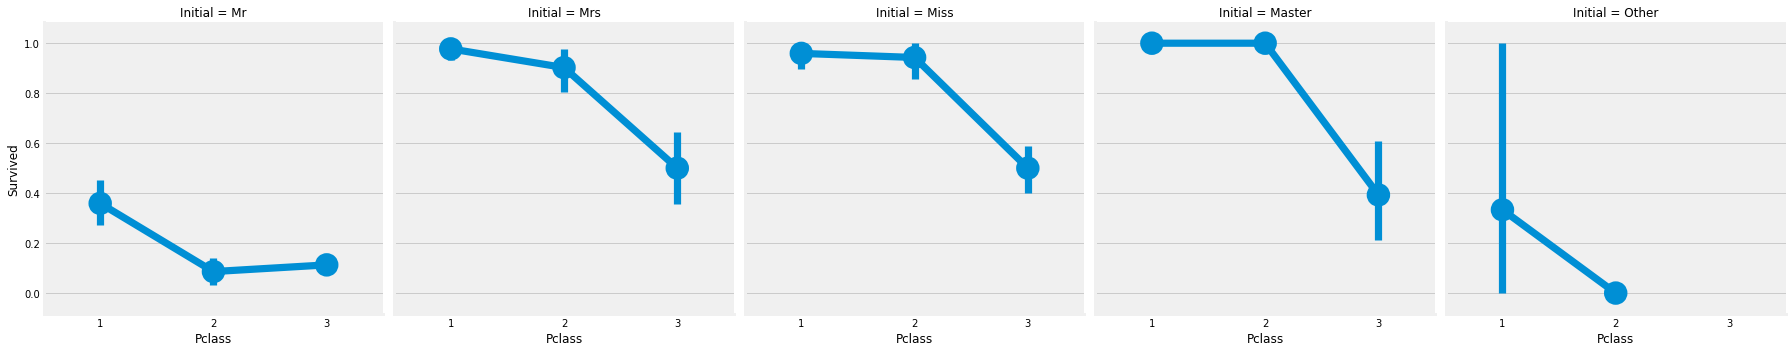

In [23]:
sns.factorplot('Pclass','Survived',col='Initial',data=train_df)

In [24]:
# 为Embarked属性填充缺失值
# 使用众数来填充港口缺失值，众数为S港
train_df['Embarked'].fillna('S',inplace=True)

In [25]:
# 挖掘兄弟姐妹的数量
pd.crosstab(train_df['SibSp'],train_df['Survived']).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


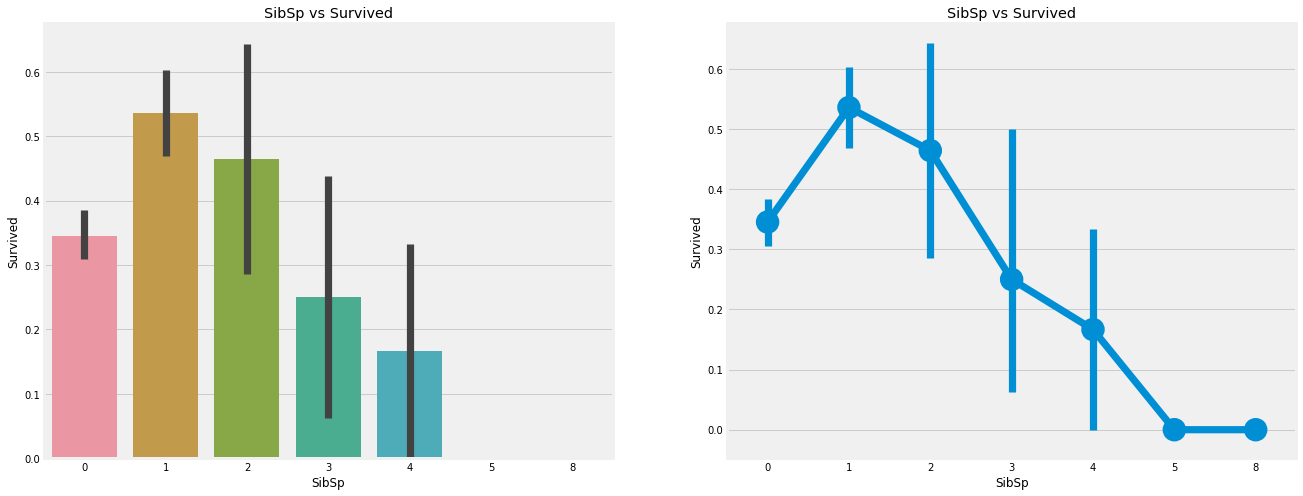

In [26]:
# 绘图显示兄弟姐妹数量和存活的关系
fig,axes = plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived',data=train_df,ax=axes[0])
axes[0].set_title('SibSp vs Survived')

sns.factorplot('SibSp','Survived',data=train_df,ax=axes[1])
axes[1].set_title('SibSp vs Survived')

plt.close(2)

In [27]:
# 是否有兄弟姐妹和船舱等级关系
pd.crosstab(train_df['SibSp'],train_df['Pclass']).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


由上图可知，有1个兄弟姐妹的时候，存活率最高，之后随着兄妹数量递增，存活率逐渐降低。pclass=3的情况可以基本断定为穷人较多的普通舱。

In [28]:
# 父母的数量
pd.crosstab(train_df['Parch'],train_df['Pclass']).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


大家庭都在pclass=3

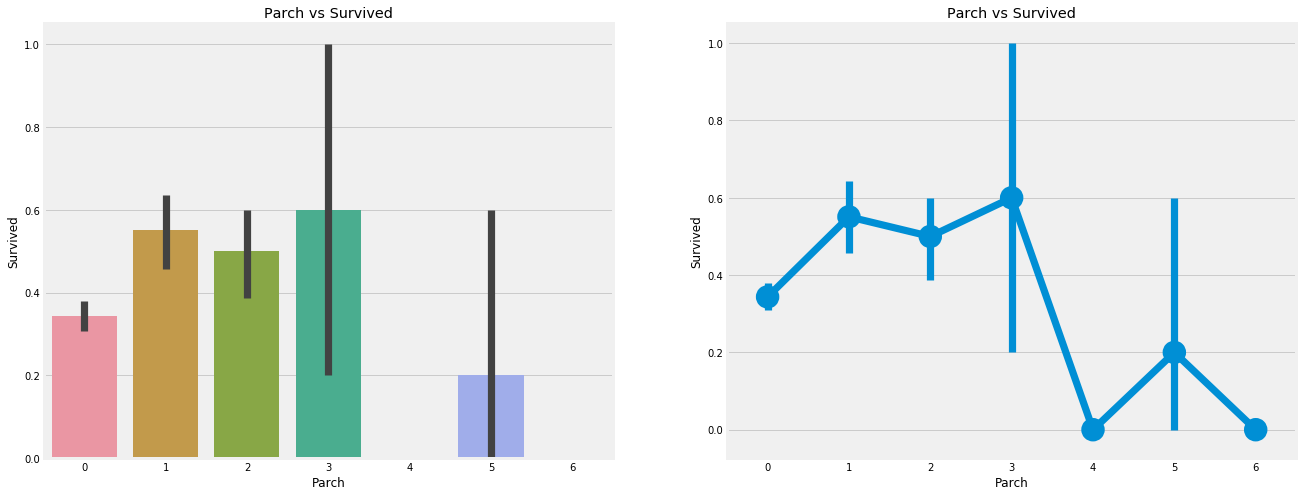

In [29]:
# 绘图可视化出是否有父母和孩子与存活之间的关系
f,ax = plt.subplots(1,2,figsize=(20,8))
sns.barplot('Parch','Survived',data=train_df,ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch','Survived',data=train_df,ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)

在船上的家庭父母人数中有1-3个的人的生存机会是好的。独自一人也证明是致命的，当船上有4个父母时，生存的机会就会减少。

In [30]:
# 船票价格
print('Highest Fare was:',train_df['Fare'].max())
print('Lowest Fare was:',train_df['Fare'].min())
print('Average Fare was:',train_df['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


Text(0.5, 1.0, 'Fares in Pclass 3')

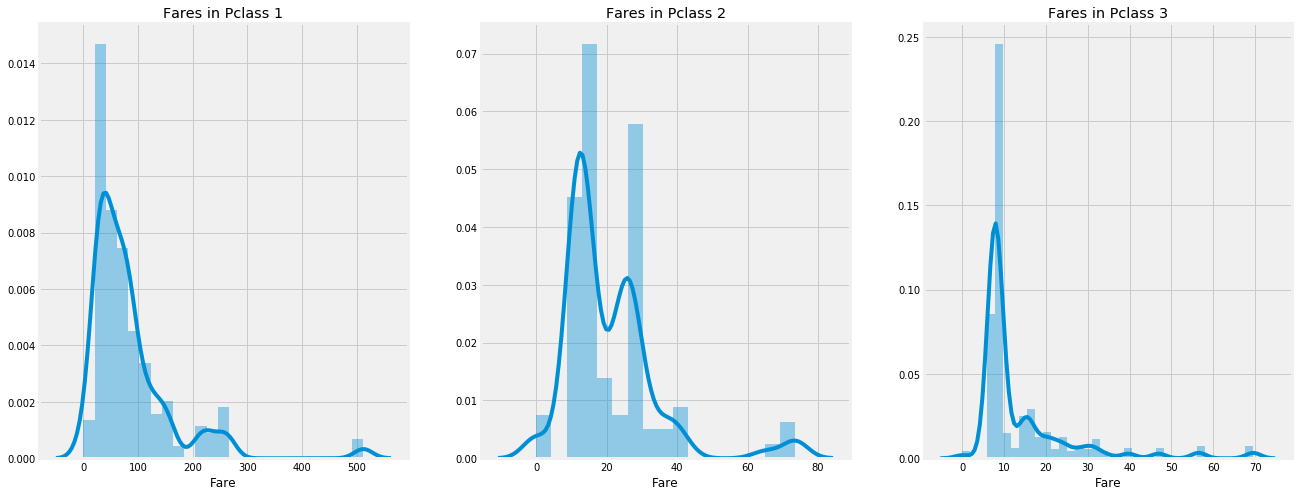

In [31]:
# 绘图可视化
f,ax = plt.subplots(1,3,figsize=(20,8))
sns.distplot(train_df[train_df['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(train_df[train_df['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(train_df[train_df['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')

数据探索总结：
- 性别：与男性相比，女性的生存机会很高。
- Pclass：一级船舱的存活率很高，很遗憾对于pclass3成活率很低。
- 年龄：小于5-10岁的儿童存活率高。年龄在15到35岁之间的乘客死亡很多。
- 港口：上来的仓位也有区别，死亡率也很大！ 
- 家庭：有1-2的兄弟姐妹、配偶或父母上1-3显示而不是独自一人或有一个大家庭旅行，你有更大的概率存活。